<font size="+3" font color='blue'><strong>1. INTRODUCTION</font></strong>

<font size="+1">Heart attack is the major cause of morbidity and mortality in the world. In every hospital and heart  centre, the patients' records have to be carefully scrutinised by cardiologists to make a diagnosis of a heart failure.

This research study is an attempt to reduce the effort and time by automating the risk prediction with the help of a binary classifier. 

In my study, various machine leanrning models were used to build the classifier. And one of the resulting algorithms gave an accuracy score of 84%.</font>

<font size="+3" font color='blue'><strong>2. OBJECTIVE</font></strong>
### To predict whether a patient is at risk for a heart attack. This is a binary outcome.

<strong>Negative (-)</strong> = 0, patient is NOT at risk<br>
<strong>Positive (+)</strong> = 1, patient is at risk

<font size="+3" font color='blue'><strong>3. METHODOLOGY</font></strong>

<strong>Data Source:</strong> Kaggle <font size="-1">(https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility)</font>
<br>
<br>
<strong>Prediction Metric</strong>: Classification Model
<br>
<br>
<strong>ML Models</strong>: Logistics Regression, Random Forest and Decision Tree
<br>
<br>
<strong>Tools</strong>: Pandas, Numpy, Seaborn and Scikit Learn via Jupyter Notebook IDE

<font size="+3" font color='blue'><strong>4. PROCESS FLOW</font></strong>
### Process of collecting, transforming, cleaning, and modeling data to meet the objective.

# 4.1 Imports and Data Cleaning 

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
# connect to sql view
import pyodbc
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=WSAMZN-DAVSQS3E;'
                      'Database=NoelHasAHeartAttack;'
                      'Trusted_Connection=yes;')

data = pd.read_sql_query('SELECT * FROM heart_attack_data_cleaned', conn)
cursor = conn.cursor()

In [6]:
data.shape

(294, 11)

In [7]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,167,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0
5,32,0,2,105,198,0,0,165,0,0.0,0
6,32,1,2,110,225,0,0,184,0,0.0,0
7,32,1,2,125,254,0,0,155,0,0.0,0
8,33,1,3,120,298,0,0,185,0,0.0,0
9,34,0,2,130,161,0,0,190,0,0.0,0


In [8]:
data.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
284,49,1,4,128,212,0,0,96,1,0.0,1
285,49,1,4,150,222,0,0,122,0,2.0,1
286,50,1,4,140,231,0,1,140,1,5.0,1
287,50,1,4,140,341,0,1,125,1,2.5,1
288,52,1,4,140,266,0,0,134,1,2.0,1
289,52,1,4,160,331,0,0,94,1,2.5,1
290,54,0,3,130,294,0,1,100,1,0.0,1
291,56,1,4,155,342,1,0,150,1,3.0,1
292,58,0,2,180,393,0,0,110,1,1.0,1
293,65,1,4,130,275,0,1,115,1,1.0,1


# 4.2 Understanding the Dataset
1. age: #
2. sex: (binary, 1 = male, 0 = female )
3. cp: Chest Pain (type [4 values, ordinal]: 1. typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)
4. trestbps: Resting Blood Pressure (#, normal blood pressure = > 120/80 mm)
5. chol: Serum Cholesterol (#, normal serum cholesterol = > 200 mg/dL)
6. fps: Fasting Blood Sugar (binary, > 120 mg/dl, 1 = true; 0 = false]
7. restecg: Resting Electrocardiographic Results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy)
8. thalach: Maximum Heart Rate Achieved (#)
9. exang: Exercise-induced Angina (binary, 1 = yes, 0 = no)
10. oldpeak: ST Depression induced by Exercise Relative to Rest (#)
11. slope: The Slope of the Peak Exercise ST Segment (ordinal, 1 = upsloping, 2 = flat, 3 = downsloping)
12. ca: Number of Major Vessels Coloured by Fluoroscopy (ordinal, 0-3, ) 
13. thal: Maximum Heart Rate Achieved (Ordinal, 3 = normal, 6 = fixed defect, 7 = reversable defect]
14. num: Diagnosis of Heart Disease (binary, 0 = < 50% diameter narrowing, 1 = > 50% diameter narrowing)

In [9]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
num           int64
dtype: object

In [10]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,132.642857,248.173469,0.068027,0.217687,139.098639,0.302721,0.586054,0.360544
std,7.811812,0.447533,0.965117,17.625755,66.794171,0.252222,0.460257,23.555478,0.460219,0.908648,0.480977
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,205.250000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,239.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,280.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,1.000000


# 4.3 Exploratory Data Analysis (EDA)

In [11]:
import pandas_profiling as pp
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

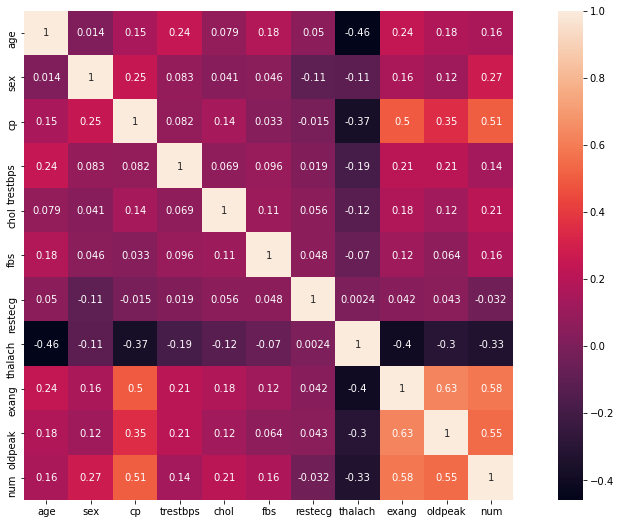

In [12]:
# Visualization of Correlation in Data

import matplotlib.pyplot as plt
import seaborn as sns

corrmat = data.corr()
f, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(corrmat, vmax=None, square=True, annot=True);

<font color='red'>
<strong>OBSERVATION<br>
oldpeak</strong>(ST depression induced by exercise relative to rest), <strong>exang</strong> (exercise-induced angina), and <strong>cp</strong> (chest pain) have the most correlation with <strong>num</strong> (diagnosis of heart disease)</font>

# 4.4 Preprocessing the Data

In [19]:
# Rename 'num' to 'target' for easier comprehension which measures the "diganosis of heart disease" in binary.
# 0 = < 50% diameter narrowing, which means good.
# 1 = > 50% diameter narrowing), which means bad.

data.rename(columns={'num       ': 'target'}, inplace=True) 
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,-0.150199,-1.742241,0,2,1.951972,-0.658898,0.0,0
1,29,1,2,-0.718518,-0.077586,0,0,0.888838,-0.658898,0.0,0
2,29,1,2,0.418120,-1.217350,0,0,1.314091,-0.658898,0.0,0
3,30,0,1,2.123077,-0.167567,0,1,1.314091,-0.658898,0.0,0
4,31,0,2,-1.855155,-0.437511,0,1,0.463584,-0.658898,0.0,0
5,32,0,2,-1.570996,-0.752446,0,0,1.101465,-0.658898,0.0,0
6,32,1,2,-1.286836,-0.347530,0,0,1.909446,-0.658898,0.0,0
7,32,1,2,-0.434358,0.087380,0,0,0.676211,-0.658898,0.0,0
8,33,1,3,-0.718518,0.747243,0,0,1.951972,-0.658898,0.0,0
9,34,0,2,-0.150199,-1.307331,0,0,2.164598,-0.658898,0.0,0


In [14]:
# Scaling a few attributes using normal scaler, to allow better algorithm convergence.

standardScaler = StandardScaler()
columns_to_scale = ['trestbps', 'chol','thalach', 'exang']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])

# 4.5 Final Preprocessed Data

In [18]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,-0.150199,-1.742241,0,2,1.951972,-0.658898,0.0,0
1,29,1,2,-0.718518,-0.077586,0,0,0.888838,-0.658898,0.0,0
2,29,1,2,0.418120,-1.217350,0,0,1.314091,-0.658898,0.0,0
3,30,0,1,2.123077,-0.167567,0,1,1.314091,-0.658898,0.0,0
4,31,0,2,-1.855155,-0.437511,0,1,0.463584,-0.658898,0.0,0
5,32,0,2,-1.570996,-0.752446,0,0,1.101465,-0.658898,0.0,0
6,32,1,2,-1.286836,-0.347530,0,0,1.909446,-0.658898,0.0,0
7,32,1,2,-0.434358,0.087380,0,0,0.676211,-0.658898,0.0,0
8,33,1,3,-0.718518,0.747243,0,0,1.951972,-0.658898,0.0,0
9,34,0,2,-0.150199,-1.307331,0,0,2.164598,-0.658898,0.0,0


<font size="+3" font color='blue'><strong>5. DATA PREPARATION</font></strong>

# 5.1 Splitting the data in to Training and Testing datasets.¶

In [20]:
y = data['num']
X = data.drop('num',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

#80% Train and 20% Test Data

In [21]:
# Checking if the data is equally splitted or not, otherwise it will cause data imbalance.
from collections import Counter

print(y_test.unique())
Counter(y_train)

[1 0]


Counter({0: 155, 1: 80})

In [22]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak
0,28,1,2,-0.150199,-1.742241,0,2,1.951972,-0.658898,0.0
1,29,1,2,-0.718518,-0.077586,0,0,0.888838,-0.658898,0.0
2,29,1,2,0.418120,-1.217350,0,0,1.314091,-0.658898,0.0
3,30,0,1,2.123077,-0.167567,0,1,1.314091,-0.658898,0.0
4,31,0,2,-1.855155,-0.437511,0,1,0.463584,-0.658898,0.0
...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,1.554758,1.242141,0,0,-1.917836,1.517686,2.5
290,54,0,3,-0.150199,0.687256,0,1,-1.662683,1.517686,0.0
291,56,1,4,1.270599,1.407106,1,0,0.463584,1.517686,3.0
292,58,0,2,2.691396,2.171948,0,0,-1.237430,1.517686,1.0


In [23]:
y

0      0
1      0
2      0
3      0
4      0
      ..
289    1
290    1
291    1
292    1
293    1
Name: num, Length: 294, dtype: int64

In [24]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak
135,53,1,2,0.418120,1.077175,0,0,0.973888,-0.658898,0.0
64,43,0,2,0.986439,-0.932409,0,0,0.633686,-0.658898,0.0
20,37,0,2,-0.718518,0.177361,0,0,-0.386923,-0.658898,0.0
46,41,0,2,-0.434358,-0.962403,0,0,1.739345,-0.658898,0.0
150,54,1,2,-0.718518,-0.032595,0,0,-1.237430,-0.658898,0.0
...,...,...,...,...,...,...,...,...,...,...
251,41,1,4,-0.150199,-1.142365,0,1,-0.386923,-0.658898,2.0
192,36,1,2,-0.718518,0.282339,0,0,0.888838,-0.658898,3.0
117,51,0,3,-1.286836,-0.872421,0,0,-0.812176,-0.658898,0.0
47,41,0,2,-0.150199,-0.047592,0,0,0.463584,-0.658898,0.0


In [25]:
X_test[:10]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak
216,54,1,4,-0.434358,-0.482502,0,0,0.038331,-0.658898,0.0
212,50,0,3,0.418120,0.597274,0,0,0.038331,1.517686,0.0
45,41,0,2,-1.286836,0.027392,0,1,0.123381,-0.658898,0.0
230,45,1,4,-0.150199,-0.437511,0,1,-0.386923,1.517686,1.0
22,37,0,4,-0.150199,-1.127368,0,1,1.909446,-0.658898,0.0
239,52,1,4,2.123077,-0.872421,0,0,-0.557024,1.517686,1.5
184,61,0,4,-0.150199,0.687256,0,1,-0.812176,1.517686,1.0
199,41,1,4,-0.718518,-0.167567,0,0,-0.046720,1.517686,1.0
59,43,0,1,-1.855155,-0.377524,0,0,0.123381,-0.658898,0.0
73,45,0,4,-0.036535,0.732246,0,0,0.208432,-0.658898,0.0


In [26]:
y_test[:10]

216    1
212    1
45     0
230    1
22     0
239    1
184    0
199    1
59     0
73     0
Name: num, dtype: int64

D:\Users\sgunited3\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


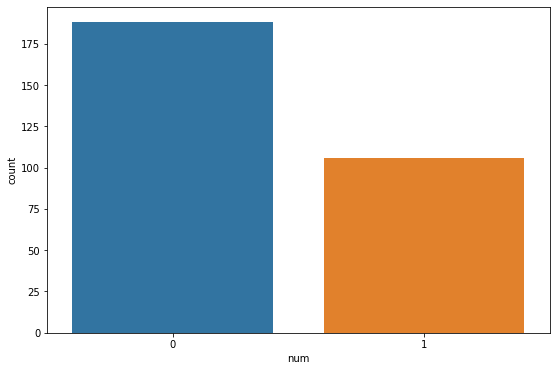

In [27]:
# Plotting the Target (Heart Disease)

plt.figure(figsize=(9, 6))
sns.countplot(y)
plt.show()

In [28]:
# Analysing the shape of X_train and X_test Data

print(X_train.shape)
print(X_test.shape)

(235, 10)
(59, 10)


 # 5.2 Training the Models
### Using these Machine Learning models:
1. Logistic Regression
2. Random Forest
3. Decision Tree

## 1. LOGISTICS REGRESSION

In [29]:
trained_records = []

In [30]:
model = LogisticRegression()

In [31]:
import time

start = time.time()

# Train model
model.fit(X_train,y_train)
train_time = time.time() - start

# Test model
y_pred = model.predict(X_test)

# Get model name
model_name = model.__class__.__name__

# Results
test_precision = precision_score(y_test, y_pred, pos_label=1)
test_recall = recall_score(y_test, y_pred, pos_label=1)
test_f1score = f1_score(y_test, y_pred, pos_label=1)
test_acc_score = accuracy_score(y_test, y_pred)

# Print Accuracy Scores
print("Accuracy of Logistic Regression: {:.3f}".format(test_acc_score*100),'%\n')
print(classification_report(y_test,y_pred))

# Store record into trained dist
trained_records.append({
    'model': model_name, 
    'train_time': train_time, 
    'r2': test_precision, 
    'recall': test_recall, 
    'f1score': test_f1score,
    'acc_score': test_acc_score
})
trained_records

Accuracy of Logistic Regression: 84.746 %

              precision    recall  f1-score   support

           0       0.85      0.88      0.87        33
           1       0.84      0.81      0.82        26

    accuracy                           0.85        59
   macro avg       0.85      0.84      0.84        59
weighted avg       0.85      0.85      0.85        59



D:\Users\sgunited3\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[{'model': 'LogisticRegression',
  'train_time': 0.06859254837036133,
  'r2': 0.84,
  'recall': 0.8076923076923077,
  'f1score': 0.8235294117647058,
  'acc_score': 0.847457627118644}]

## 2. RANDOM FOREST

In [32]:
model = RandomForestClassifier()

In [33]:
import time

start = time.time()

# train model
model.fit(X_train,y_train)
train_time = time.time() - start

# test model
y_pred = model.predict(X_test)

# get model name
model_name = model.__class__.__name__

# results
test_precision = precision_score(y_test, y_pred, pos_label=1)
test_recall = recall_score(y_test, y_pred, pos_label=1)
test_f1score = f1_score(y_test, y_pred, pos_label=1)
test_acc_score = accuracy_score(y_test, y_pred)

# Print Accuracy Scores
print("Accuracy of Random Forest: {:.3f}".format(test_acc_score*100),'%\n')
print(classification_report(y_test,y_pred))


# store record into trained dist
trained_records.append({
    'model': model_name, 
    'train_time': train_time, 
    'r2': test_precision, 
    'recall': test_recall, 
    'f1score': test_f1score,
    'acc_score': test_acc_score
})
trained_records[1]

Accuracy of Random Forest: 83.051 %

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        33
           1       0.86      0.73      0.79        26

    accuracy                           0.83        59
   macro avg       0.84      0.82      0.82        59
weighted avg       0.83      0.83      0.83        59



{'model': 'RandomForestClassifier',
 'train_time': 0.3154003620147705,
 'r2': 0.8636363636363636,
 'recall': 0.7307692307692307,
 'f1score': 0.7916666666666666,
 'acc_score': 0.8305084745762712}

## 3. DECISION TREE

In [34]:
model = DecisionTreeClassifier()

In [35]:
import time

start = time.time()

# train model
model.fit(X_train,y_train)
train_time = time.time() - start

# test model
y_pred = model.predict(X_test)

# get model name
model_name = model.__class__.__name__

# results
test_precision = precision_score(y_test, y_pred, pos_label=1)
test_recall = recall_score(y_test, y_pred, pos_label=1)
test_f1score = f1_score(y_test, y_pred, pos_label=1)
test_acc_score = accuracy_score(y_test, y_pred)

# Print Accuracy Scores
print("Accuracy of Decision Tree: {:.3f}".format(test_acc_score*100),'%\n')
print(classification_report(y_test,y_pred))

# store record into trained dist
trained_records.append({
    'model': model_name, 
    'train_time': train_time, 
    'r2': test_precision, 
    'recall': test_recall, 
    'f1score': test_f1score,
    'acc_score': test_acc_score
})
trained_records[2]

Accuracy of Decision Tree: 79.661 %

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        33
           1       0.82      0.69      0.75        26

    accuracy                           0.80        59
   macro avg       0.80      0.79      0.79        59
weighted avg       0.80      0.80      0.79        59



{'model': 'DecisionTreeClassifier',
 'train_time': 0.0,
 'r2': 0.8181818181818182,
 'recall': 0.6923076923076923,
 'f1score': 0.7500000000000001,
 'acc_score': 0.7966101694915254}

# 5.3 Evaluation of Models

In [36]:
trained_records

[{'model': 'LogisticRegression',
  'train_time': 0.06859254837036133,
  'r2': 0.84,
  'recall': 0.8076923076923077,
  'f1score': 0.8235294117647058,
  'acc_score': 0.847457627118644},
 {'model': 'RandomForestClassifier',
  'train_time': 0.3154003620147705,
  'r2': 0.8636363636363636,
  'recall': 0.7307692307692307,
  'f1score': 0.7916666666666666,
  'acc_score': 0.8305084745762712},
 {'model': 'DecisionTreeClassifier',
  'train_time': 0.0,
  'r2': 0.8181818181818182,
  'recall': 0.6923076923076923,
  'f1score': 0.7500000000000001,
  'acc_score': 0.7966101694915254}]

In [37]:
trained_records = pd.DataFrame(trained_records,columns=['model','train_time','r2','recall','f1score','acc_score'])
trained_records

,model,train_time,r2,recall,f1score,acc_score
0,LogisticRegression,0.068593,0.840000,0.807692,0.823529,0.847458
1,RandomForestClassifier,0.315400,0.863636,0.730769,0.791667,0.830508
2,DecisionTreeClassifier,0.000000,0.818182,0.692308,0.750000,0.796610


In [48]:
# Store results into SQL

trained_insert = '''
    insert into params
    values (?, GETDATE(), ?, ?, ?, ?, ?)
'''

for rec in trained_records.iterrows():
    values = (
        rec[1]['model'], 
        rec[1]['train_time'], 
        rec[1]['r2'], 
        rec[1]['recall'], 
        rec[1]['f1score'],
        rec[1]['acc_score'])
    cursor.execute(trained_insert, values)

conn.commit()
#cursor.close()


ProgrammingError: ('42S02', "[42S02] [Microsoft][ODBC SQL Server Driver][SQL Server]Invalid object name 'params'. (208) (SQLExecDirectW); [42S02] [Microsoft][ODBC SQL Server Driver][SQL Server]Statement(s) could not be prepared. (8180)")

# 5.4 Test Best Model
From the above results, Logistic Regression has the highest Accuracy Score of 84%. So we will use Logistic Regression to predict the test set.

In [40]:
best_model = LogisticRegression()
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)

D:\Users\sgunited3\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
test_pred = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
test_pred = test_pred.rename_axis('number')
test_pred

,Actual,Predicted
number,,
216,1,0
212,1,0
45,0,0
230,1,1
22,0,0
239,1,1
184,0,1
199,1,1
59,0,0


In [51]:
# Insert best test model record into SQL
testPred_insert = '''
    INSERT INTO test_pred
    values(?, GETDATE(), ?, ?)
'''

for rec in test_pred.iterrows():
    values = (rec[0], rec[1]['Actual'], rec[1]['Predicted'])
    cursor.execute(testPred_insert, values)
conn.commit()
# cursor.close()

ProgrammingError: ('Invalid parameter type.  param-index=1 param-type=numpy.int64', 'HY105')

<font size="+3" font color='blue'><strong>6. CONCLUSION</font></strong>